In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from latexify import *
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
%config InlineBackend.figure_format = 'retina'


In [2]:
# Choose some points between

In [3]:
np.random.seed(0)
x1 = np.random.randn(1, 100)
x2 = np.random.randn(1, 100)


In [4]:
y = x1**2 + x2**2

In [5]:
x1

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
        -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
         0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
        -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
        -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
         0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
        -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
        -0.40178094, -1.63019835,  0.46278226, -0.9

In [6]:
y[y>1] = 1
y[y<1] = 0

c = 0
for i in range(100):
    if y[0, i] == 1:
        y[0, i] = 0
        c += 1
    if c == 10:
        break

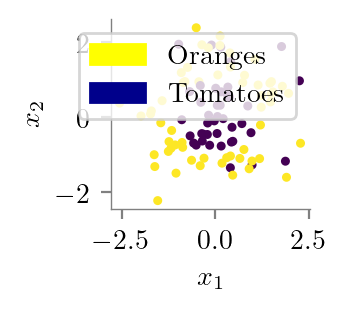

In [7]:
latexify()
plt.scatter(x1, x2, c=y,s=5)


yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')
format_axes(plt.gca())
plt.savefig("../figures/logistic-regression/logisitic-circular-data.pdf", bbox_inches="tight", transparent=True)

In [8]:
np.vstack((x1, x2)).shape

(2, 100)

In [9]:
clf_1 = LogisticRegression(penalty='none',solver='newton-cg')
clf_1.fit(np.vstack((x1, x2)).T, y.T)

/home/nipun.batra/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/nipun.batra/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none', solver='newton-cg')

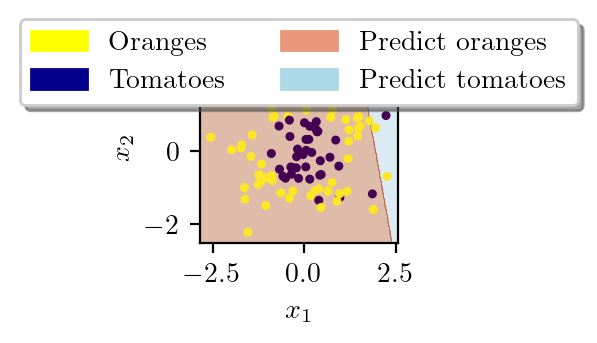

In [10]:
X = np.vstack((x1, x2)).T
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
latexify()
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict oranges')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict tomatoes')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch], loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x1, x2, c=y,s=5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')
plt.savefig("../figures/logistic-regression/logisitic-linear-prediction.pdf", bbox_inches="tight", transparent=True)

In [11]:
new_x = np.zeros((4, 100))


In [12]:
new_x[0] = x1
new_x[1] = x2
new_x[2] = x1**2
new_x[3] = x2**2

In [13]:
clf = LogisticRegression(penalty='none',solver='newton-cg')

In [14]:
clf.fit(new_x.T, y.T)

/home/nipun.batra/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/nipun.batra/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none', solver='newton-cg')

In [15]:
clf.coef_

array([[-0.50464855, -0.30337009,  1.08937351,  0.73697949]])

In [16]:
new_x.T[:, 0]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [17]:
X = np.vstack((x1, x2)).T
X.shape

(100, 2)

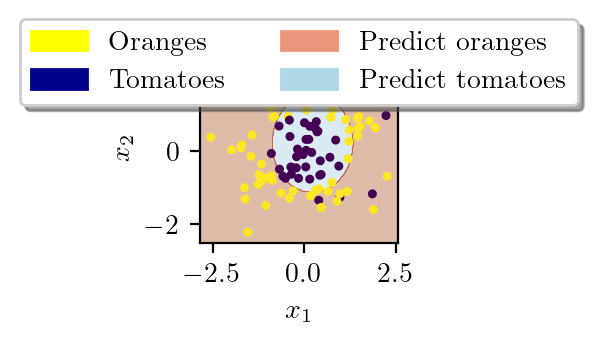

In [18]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
latexify()
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict oranges')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict tomatoes')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch], loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x1, x2, c=y,s=5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')
plt.savefig("../figures/logistic-regression/logisitic-circular-prediction.pdf", bbox_inches="tight", transparent=True)

In [19]:
Z.shape

(261, 272)

In [20]:
np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())]

array([[-2.85298982, -2.52340315,  8.13955089,  6.36756347],
       [-2.83298982, -2.52340315,  8.0258313 ,  6.36756347],
       [-2.81298982, -2.52340315,  7.9129117 ,  6.36756347],
       ...,
       [ 2.52701018,  2.67659685,  6.38578047,  7.16417069],
       [ 2.54701018,  2.67659685,  6.48726088,  7.16417069],
       [ 2.56701018,  2.67659685,  6.58954129,  7.16417069]])

In [21]:
xx.ravel()

array([-2.85298982, -2.83298982, -2.81298982, ...,  2.52701018,
        2.54701018,  2.56701018])

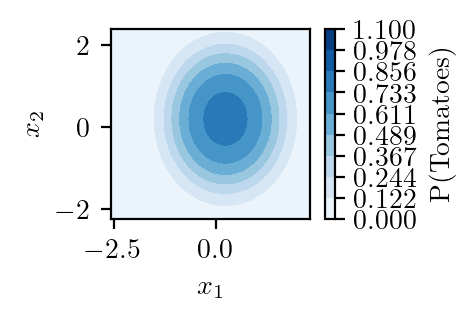

In [22]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])
# Put the result into a color plot
Z = Z[:, 0].reshape(xx.shape)
latexify()
plt.contourf(xx, yy, Z,levels=np.linspace(0, 1.1, num=10),cmap='Blues')
plt.gca().set_aspect('equal')
#plt.scatter(x1, x2, c=y)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.colorbar(label='P(Tomatoes)')
plt.savefig("../figures/logistic-regression/logisitic-circular-probability.pdf", bbox_inches="tight", transparent=True)

In [23]:
xx.shape

(233, 244)

In [24]:
Z.size

56852

In [25]:
np.linspace(0, 1.1, num=50)

array([0.        , 0.02244898, 0.04489796, 0.06734694, 0.08979592,
       0.1122449 , 0.13469388, 0.15714286, 0.17959184, 0.20204082,
       0.2244898 , 0.24693878, 0.26938776, 0.29183673, 0.31428571,
       0.33673469, 0.35918367, 0.38163265, 0.40408163, 0.42653061,
       0.44897959, 0.47142857, 0.49387755, 0.51632653, 0.53877551,
       0.56122449, 0.58367347, 0.60612245, 0.62857143, 0.65102041,
       0.67346939, 0.69591837, 0.71836735, 0.74081633, 0.76326531,
       0.78571429, 0.80816327, 0.83061224, 0.85306122, 0.8755102 ,
       0.89795918, 0.92040816, 0.94285714, 0.96530612, 0.9877551 ,
       1.01020408, 1.03265306, 1.05510204, 1.07755102, 1.1       ])